In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from pandas.tools.plotting import table
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 9] # bigger figures
plt.rcParams['font.size'] = 20
pd.set_option('display.max_rows',100)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:880: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [99]:
# Separtors: whitspace, not just tab
# Don't use first column as index
# more info: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html
dat = pd.read_table(open('arroz.txt'), delim_whitespace=True, index_col=False)

In [100]:
dat

,n,mn,m
0,24,0.44,NaN
1,24,0.46,NaN
2,24,0.44,NaN
3,24,0.42,NaN
4,24,0.42,NaN
5,24,0.45,NaN
6,24,0.43,NaN
7,24,0.45,NaN
8,24,0.46,NaN
9,24,0.47,NaN


In [115]:
dat.m = np.round(dat.mn / dat.n, 4)
dat
dat.to_csv('arrozz.txt', header=True, index=False, sep=' ', mode='a')


In [109]:
dat.describe()

,n,mn,m
count,52.000000,52.000000,52.000000
mean,24.192308,0.448462,0.018544
std,0.595357,0.022263,0.000794
min,24.000000,0.400000,0.016700
25%,24.000000,0.430000,0.017900
50%,24.000000,0.450000,0.018800
75%,24.000000,0.460000,0.019200
max,26.000000,0.500000,0.020400


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


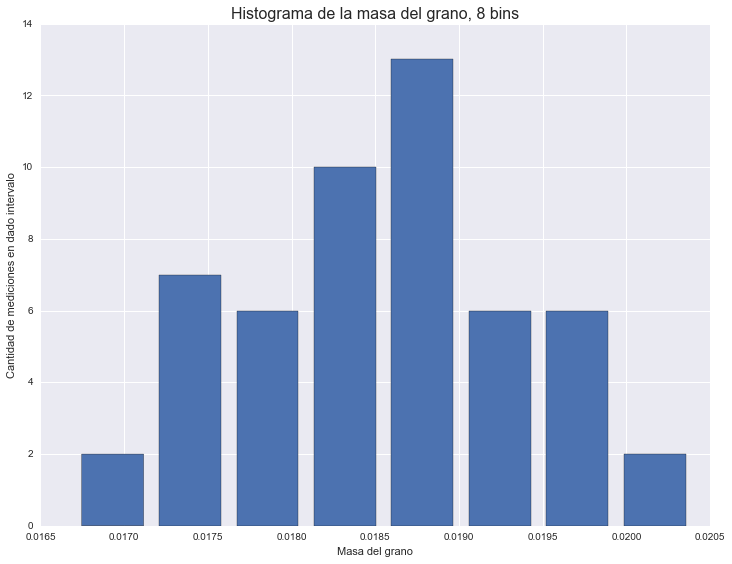

In [118]:
plt.hist(dat.m, bins=8, align="mid", rwidth=0.8)
plt.xlabel('Masa del grano')
plt.ylabel('Cantidad de mediciones en dado intervalo')
plt.title('Histograma de la masa del grano, 8 bins', size=16)
plt.legend()
plt.savefig('histo8.pdf')

In [10]:
def madel(H, h):
    return  np.sqrt(9.78*(H + h))

In [45]:
def model (H, h):
    return np.sqrt(9.78) * (2*H + h)/(2*H**(1/2) )

In [34]:
def midel(g, j):
     return   np.sqrt(g)*(j)

In [43]:
fit_res = curve_fit(midel, det.j, det.v, sigma = dat.sv, method='lm')
print(fit_res)
fg = fit_res[0] 
sg=(np.diag(fit_res[1]))
print(fg)

(array([ 0.39690329]), array([[ 0.00043651]]))
[ 0.39690329]


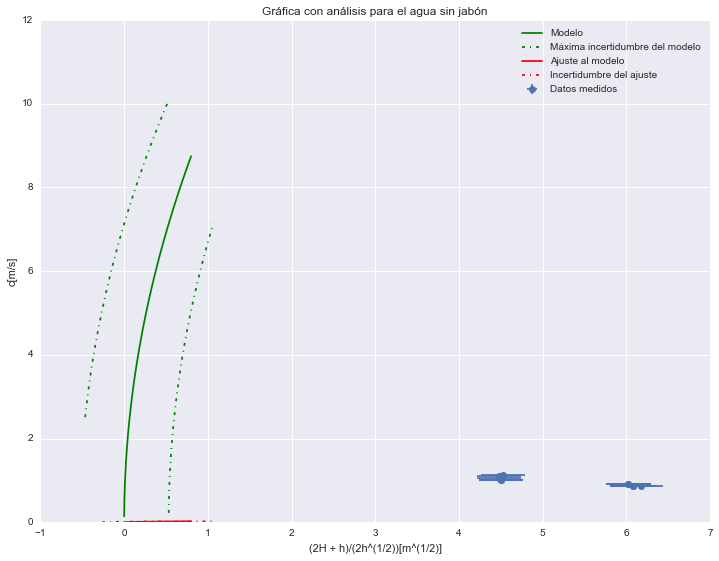

In [33]:
xj = np.linspace(-0.2, 0.8, 1000)
plt.errorbar(det.j, dat.v, xerr=det.sj, yerr=dat.sv, fmt="o", label = "Datos medidos")
plt.plot(xj, midel(9.78, xj), 'g-', label="Modelo")
plt.plot(xj - np.amin(det.sj), midel(9.78, xj + np.amin(det.sj)), 'g-.', label="Máxima incertidumbre del modelo")
plt.plot(xj + np.amin(det.sj), midel(9.78, xj - np.amin(det.sj)), 'g-.', label = "")
plt.plot(xj, midel(fg, xj), 'r-', label="Ajuste al modelo")
plt.plot(xj - np.amin(det.sj), midel(fg + sg, xj), 'r-.', label="Incertidumbre del ajuste")
plt.plot(xj + np.amin(det.sj), midel(fg - sg, xj), 'r-.', label = "")
plt.xlabel('(2H + h)/(2h^(1/2))[m^(1/2)]')
plt.ylabel('c[m/s]')
plt.title('Gráfica con análisis para el agua sin jabón')
plt.legend()
plt.savefig('vjt1.pdf')

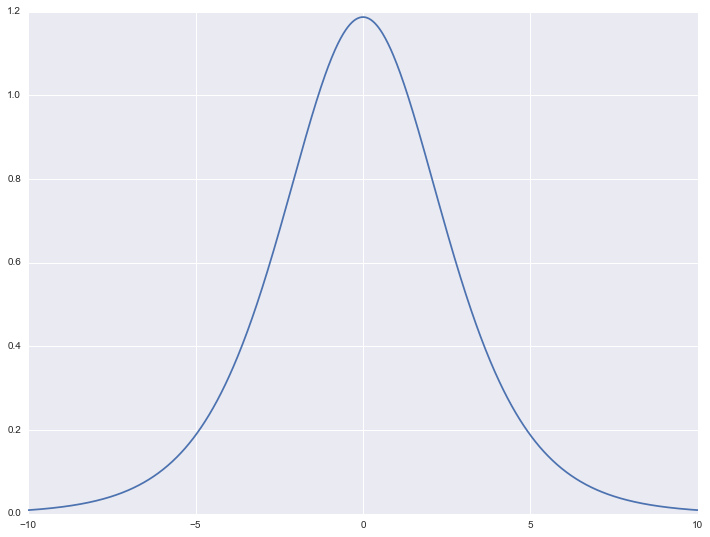

In [66]:
xs = np.linspace(-10, 10, 1000)
plt.plot(xs, 3 * 0.629**2 * 1 /np.square(np.cosh(0.629 / 2 * xs)))
plt.savefig('sech.png')

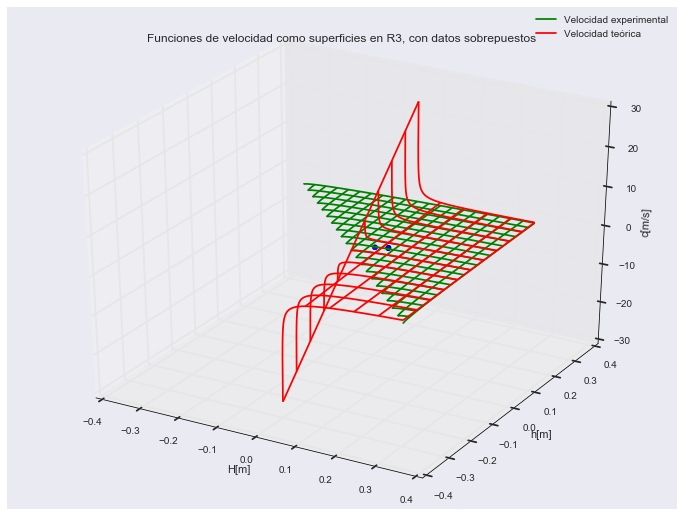

In [51]:
fig = plt.figure()
xx = np.linspace(-0.3, .3, 1000)
xy = np.linspace(-.3, .3, 1000)
xi, xj = np.meshgrid(xx, xy, sparse=False, indexing='ij')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dat.H, dat.h, dat.v, s = 25, c = "b")
ax.plot_wireframe(xi, xj, madel(xi,xj), rstride=50, cstride=50, color="g", label = "Velocidad experimental")
ax.plot_wireframe(xi, xj, model(xi,xj), rstride=100, cstride=100, color = "r", label = "Velocidad teórica")
plt.xlabel('H[m]')
plt.ylabel('h[m]')
ax.set_zlabel('c[m/s]')
plt.title("Funciones de velocidad como superficies en R3, con datos sobrepuestos")
plt.legend()
plt.savefig('v3d.png')

In [119]:
print(dat.to_latex(column_format='|'.join(['', "l"] + len(dat.columns) * ['r'] + [""])))

\begin{tabular}{|l|r|r|r|}
\toprule
{} &   n &    mn &       m \\
\midrule
0  &  24 &  0.44 &  0.0183 \\
1  &  24 &  0.46 &  0.0192 \\
2  &  24 &  0.44 &  0.0183 \\
3  &  24 &  0.42 &  0.0175 \\
4  &  24 &  0.42 &  0.0175 \\
5  &  24 &  0.45 &  0.0188 \\
6  &  24 &  0.43 &  0.0179 \\
7  &  24 &  0.45 &  0.0188 \\
8  &  24 &  0.46 &  0.0192 \\
9  &  24 &  0.47 &  0.0196 \\
10 &  24 &  0.47 &  0.0196 \\
11 &  24 &  0.44 &  0.0183 \\
12 &  24 &  0.45 &  0.0188 \\
13 &  24 &  0.47 &  0.0196 \\
14 &  24 &  0.42 &  0.0175 \\
15 &  24 &  0.47 &  0.0196 \\
16 &  24 &  0.44 &  0.0183 \\
17 &  24 &  0.45 &  0.0188 \\
18 &  24 &  0.41 &  0.0171 \\
19 &  24 &  0.47 &  0.0196 \\
20 &  24 &  0.43 &  0.0179 \\
21 &  24 &  0.44 &  0.0183 \\
22 &  24 &  0.42 &  0.0175 \\
23 &  24 &  0.42 &  0.0175 \\
24 &  24 &  0.43 &  0.0179 \\
25 &  24 &  0.42 &  0.0175 \\
26 &  24 &  0.44 &  0.0183 \\
27 &  24 &  0.46 &  0.0192 \\
28 &  24 &  0.46 &  0.0192 \\
29 &  24 &  0.44 &  0.0183 \\
30 &  24 &  0.43 &  0.017

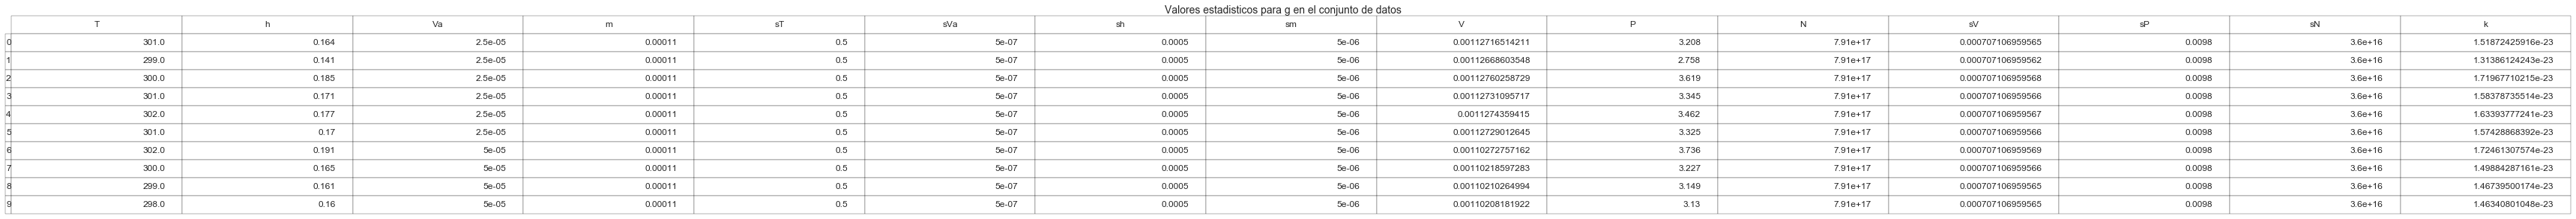

In [332]:
0.000013fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, dat, loc='upper center', colWidths=[0.17]*len(dat.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(2, 2) # change size table
plt.suptitle("Valores estadisticos para g en el conjunto de datos", fontsize=14)
plt.savefig('gw.png', transparent=True)
